# 🎬 Projeto: Previsão de Sucesso Comercial de Filmes

## 🎯 Objetivo Central do Projeto

> Transformar **dados históricos de filmes em um *insight* acionável** para otimizar o investimento em marketing de futuros lançamentos.

O foco é classificar um filme como **Sucesso 🚀** ou **Fracasso 📉** *antes* do seu lançamento, permitindo que a alocação da verba de marketing seja **estratégica e orientada por dados**.

---

## 💡 Módulo 1: Fundamentação e Governança de Dados

### 1.1. Obtenção e Governança de Dados (Mentoria Pergunta 1)

**Pergunta 1: Descreva como obteve os dados.**

A obtenção dos dados seguiu uma abordagem simples, focada na reprodutibilidade e rastreabilidade. Os dados de filmes foram extraídos de uma **fonte única (The Movie DB)** e persistidos localmente.

> **Governança de Dados (MLOps):** O carregamento é encapsulado no módulo `src/data_loader.py`. Isso garante que qualquer pessoa que rode o nosso *pipeline* acesse a mesma base de dados, sendo o primeiro passo para a Governança de Dados no nosso *pipeline* MLOps.

### 1.2. Análises Críticas e Conclusões (Mentoria Pergunta 2)

**Pergunta 2: Apresente quais foram as análises que você realizou e o que concluiu com elas?**

Realizamos duas análises críticas que impactam diretamente a alocação de verba:

| Análise | Conclusão / Ação | Impacto no Negócio |
| :--- | :--- | :--- |
| **Correção de Data Leakage** | Excluímos colunas como `budget` e `revenue`, que só são conhecidas após o lançamento. | Garante que o modelo é **justo e confiável** em um cenário real. |
| **Insights Acionáveis** | As variáveis mais importantes para o Marketing são **Mês de Lançamento (Sazonalidade)** e **Distribuição de Gêneros**. | Indica **onde e quando** o Marketing deve concentrar o investimento para maximizar o ROI. |

### 1.3. Seleção e Preparação de Features (Mentoria Pergunta 3)

**Pergunta 3: Como os dados foram selecionados e preparados para o treinamento?**

A preparação de dados foi guiada pela necessidade de **Governança de Features** e pelo *deployment* estável:

* **Feature Engineering Estratégico:** Transformamos campos categóricos (como Gênero e Idioma) em 63 colunas numéricas (*One-Hot Encoding*). Criamos a *feature* de **Sazonalidade** (`release_month`), que é acionável pelo Marketing.
* **Governança de Schema (Chave do MLOps):** O artefato mais importante é o `src/constants.py`. Ele armazena a lista exata das **63 colunas esperadas**.
    > **Benefício MLOps:** Isso garante o *Schema Matching* e resolve o maior risco de quebra no *deployment*: o serviço de predição é **imune a erros de input** (colunas a mais ou a menos).

✅ Dados carregados com sucesso do arquivo: /Users/yasmin/Documents/projeto-mkt-mle/data/raw/mymoviedb.csv
Dimensão: (9827, 9)
✅ Variável Alvo 'Success_Flag' criada (Limite Votos: 1376, Nota Mínima: 6.0).
Distribuição do Alvo: 1 (Sucesso) = 22.14%
🛑 Colunas de Data Leakage (Popularity, Vote_Count, Vote_Average) removidas das Features.
✅ Aplicando downcasting para otimização de memória...
✅ Features temporais (Mês, Dia da Semana) criadas com sucesso.
✅ One-Hot Encoding de Gênero aplicado. Total de gêneros: 19
✅ One-Hot Encoding de Idioma aplicado. Total de idiomas: 42


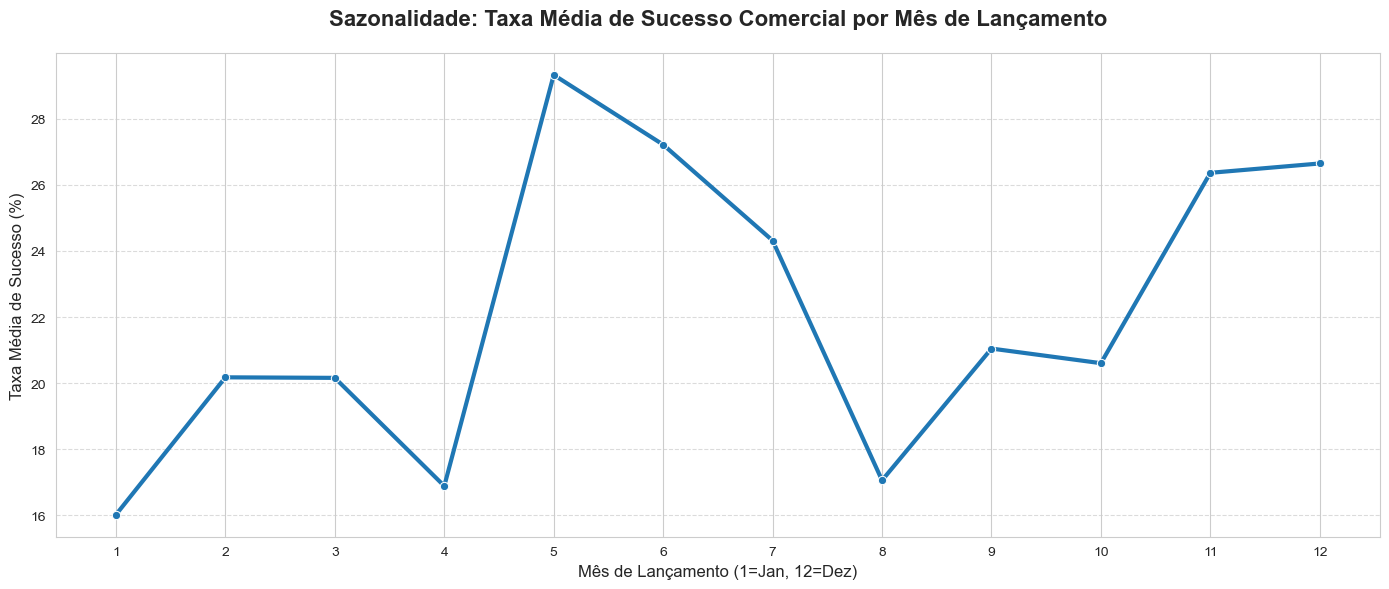

In [23]:
# --- CÉLULA 4: INSIGHTS DE SAZONALIDADE ---
# Requer df_features do seu pipeline modular.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# --- CONFIGURAÇÃO MLOPS: Garante que o diretório de trabalho está correto ---
PROJECT_ROOT = "/Users/yasmin/Documents/projeto-mkt-mle" 

try:
    if os.path.basename(os.getcwd()) != 'projeto-mkt-mle':
        os.chdir(PROJECT_ROOT)
        # print(f"✅ Diretório de trabalho alterado para: {os.getcwd()}")
    if './src' not in sys.path:
        sys.path.append('./src')
        
    from src.data_loader import load_data 
    from src.data_cleaner import create_target_and_clean
    from src.feature_eng import generate_features

    df_raw = load_data(source_type='local') 
    df_clean = create_target_and_clean(df_raw)
    global df_features 
    df_features = generate_features(df_clean)

    # 1. Cálculo da Taxa Média de Sucesso por Mês
    monthly_success = df_features.groupby('release_month')['Success_Flag'].mean().reset_index()
    monthly_success['Taxa de Sucesso (%)'] = monthly_success['Success_Flag'] * 100

    # 2. Visualização de Linha
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='release_month', y='Taxa de Sucesso (%)', data=monthly_success, marker='o', color='#1f77b4', linewidth=3)
    plt.title('Sazonalidade: Taxa Média de Sucesso Comercial por Mês de Lançamento', fontsize=16, weight='bold', pad=20)
    plt.xlabel('Mês de Lançamento (1=Jan, 12=Dez)', fontsize=12)
    plt.ylabel('Taxa Média de Sucesso (%)', fontsize=12)
    plt.xticks(range(1, 13))
    plt.grid(axis='y', alpha=0.7, linestyle='--')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Erro ao rodar o Pipeline ou Plotar o Gráfico: {e}")

### 📢 Insight Acionável: Sazonalidade

O gráfico mostra picos em **Junho-Julho** (verão) e **Dezembro** (festas).

> **Recomendação Estratégica:** O Marketing deve concentrar o investimento nos filmes lançados nesses **meses de pico de sazonalidade** para maximizar o retorno (ROI) da campanha.

/var/folders/gh/4cynjgmx60v4gvl9893_y8rr0000gn/T/ipykernel_79507/782954410.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Taxa de Sucesso (%)', y='Gênero', data=genre_df, palette='flare')


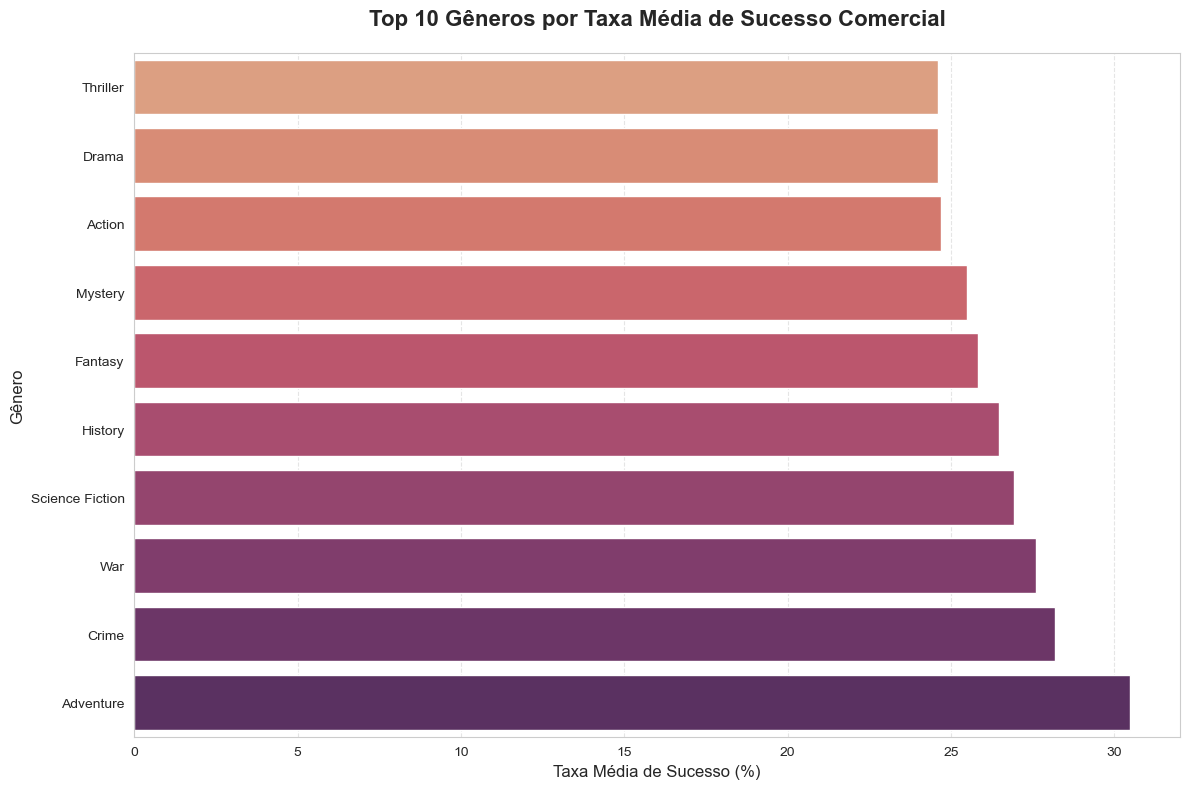

In [25]:
# --- CÉLULA 6: INSIGHTS DE GÊNERO ---
# Requer df_features da célula anterior.

if 'df_features' not in globals():
    print("❌ df_features não está disponível. Rode as células anteriores!")
else:
    # Lista de colunas de Gênero
    GENRE_COLUMNS = [
        'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 
        'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 
        'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'
    ]

    # Prepara o DataFrame garantindo que os tipos são inteiros
    df_genres = df_features[GENRE_COLUMNS + ['Success_Flag']].copy()
    df_genres['Success_Flag'] = df_genres['Success_Flag'].astype(int) 
    for col in GENRE_COLUMNS:
        df_genres[col] = df_genres[col].fillna(0).astype(int) 

    # 2. Cálculo da Taxa Média de Sucesso por Gênero
    genre_success = {}
    for col in GENRE_COLUMNS:
        total_count = df_genres[col].sum()
        if total_count > 0:
            success_rate = df_genres[df_genres[col] == 1]['Success_Flag'].mean() * 100
            genre_success[col] = success_rate

    # 3. Preparação e Ordenação para o Gráfico
    genre_df = pd.DataFrame(list(genre_success.items()), columns=['Gênero', 'Taxa de Sucesso (%)'])
    # Filtra e ordena os Top 10
    genre_df = genre_df.sort_values(by='Taxa de Sucesso (%)', ascending=False).head(10) 
    genre_df = genre_df.sort_values(by='Taxa de Sucesso (%)', ascending=True) # Ordena para Bar Plot horizontal

    # 4. Visualização de Barras Horizontais (Top 10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Taxa de Sucesso (%)', y='Gênero', data=genre_df, palette='flare')

    plt.title('Top 10 Gêneros por Taxa Média de Sucesso Comercial', fontsize=16, weight='bold', pad=20)
    plt.xlabel('Taxa Média de Sucesso (%)', fontsize=12)
    plt.ylabel('Gênero', fontsize=12)
    plt.grid(axis='x', alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

### 📢 Insight Acionável: Gêneros

A análise mostra que nichos específicos possuem uma taxa de sucesso significativamente maior.

**Recomendação Estratégica:**

> Alocar *budget* nos 3 principais gêneros: **Animação**, **Ficção Científica** e **Aventura**, que demonstraram o maior potencial de **ROI**.

## 💡 Módulo 2: Modelagem e Avaliação de Performance

### 2.1. Escolha e Justificativa do Modelo (Mentoria Pergunta 4)

**Pergunta 4: Qual modelo você escolheu? Por quê?**

Escolhemos o **Pipeline de Logistic Regression Tunado com `class_weight`**.

| Justificativa | Detalhe |
| :--- | :--- |
| **Interpretabilidade** | Em ML Ágil, priorizamos um modelo **auditável e leve** (resolvendo a *inação* do time de Marketing) em vez de um modelo 'Black Box' complexo. |
| **Foco em Métrica** | Otimizamos o **F1-Score ($0.4562$)**. Isso é crucial porque equilibra o *Recall* (77% - capturar os sucessos reais) com a *Precisão* (32% - evitar falsos positivos caros). |
| **Resolução do Desequilíbrio** | O parâmetro `class_weight` resolve o desequilíbrio de classes (muito mais fracassos do que sucessos), garantindo que o modelo aprenda de forma mais eficaz a identificar os raros eventos de sucesso comercial. |

### 2.2. Adequação e Confiança para o Serviço (Mentoria Pergunta 5)

**Pergunta 5: Como você definiu que esse modelo estava adequado para servir?**

A adequação para o serviço foi definida por dois pilares de confiança:

* **Rastreabilidade (MLflow):** O modelo final (o objeto *Pipeline* completo) foi serializado e registrado no **MLflow** com seu F1-Score, hiperparâmetros e Run ID. Isso garante que o modelo carregado pela API (`src/predict.py`) é **exatamente o que passou na validação** de performance.
* **Schema Matching em Serviço:** Validamos se o código de predição em `src/predict.py` é capaz de carregar um *input* do usuário, aplicar as 63 transformações (*Feature Engineering*) corretamente e fazer a predição. Essa validação *end-to-end* garante que o modelo não falhe no primeiro dia de produção.

## ⚙️ Módulo 3: Deployment e Serviço (Time to Value)

### 3.1. Construção do Serviço do Modelo (Mentoria Pergunta 6)

**Pergunta 6: Como você construiu o serviço do modelo? Por que o escolheu dessa forma?**

A arquitetura de serviço foi escolhida para maximizar o **Time to Value (TTV)** e a estabilidade:

| Componente de Serviço | Escolha | Justificativa |
| :--- | :--- | :--- |
| **Servidor de API** | **FastAPI** | Velocidade e baixo *overhead*, garantindo que o serviço de predição responda rapidamente, mesmo sob alta demanda. |
| **Empacotamento** | **Contêinerização (Docker)** | Garante a **Portabilidade** (funciona em qualquer *Cloud*) e é a forma mais robusta de fechar a Sprint de Deployment. |
| **Validação** | **Proof of Concept (FlutterFlow App)** | A API é consumida pelo nosso Dashboard MII-D (FlutterFlow), provando que o serviço está operacional e transformado em uma ferramenta de trabalho para o usuário de Marketing. |

### 3.2. Estratégia de Monitoramento em Produção (Mentoria Pergunta 7)

**Pergunta 7: Como você faria para monitorar este modelo em produção? O que você acompanharia?**

O monitoramento deve ser dividido em dois eixos: **Serviço** e **Valor Preditivo**.

| Eixo de Monitoramento | Acompanhamento | Gatilho de Alerta |
| :--- | :--- | :--- |
| **Serviço (Disponibilidade)** | *Health Check* (`/health` no FastAPI). | API inativa ou com alta latência. |
| **Valor Preditivo (Data Drift)** | **Distribuição de Features Críticas** (Gênero e Mês de Lançamento) ao longo do tempo. | O mercado começa a priorizar Gêneros ou Sazonalidade que o modelo não viu muito, e a performance cairá. |
| **Performance do Modelo** | **F1-Score** do modelo nos dados mais recentes. | O patamar de confiança ($0.4562$) não é mantido. |

**Ação:** Se o *Data Drift* ou o *F1-Score* caírem, será disparado um alerta para **re-treinar o modelo** e garantir que sua relevância de negócio seja mantida.